# Audio Signal Exploration

In [445]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import os

from python_speech_features import mfcc, logfbank

In [455]:
mixed_dir = ("../../../mixed")
sample = mixed_dir + "/" + os.listdir(mixed_dir)[105] # choose which wav file you want

In [456]:
### Read a file with uncompressed waveform as a memory-mapped file ###

"""
Memory-mapped files behave also like strings. They are mutable. 
So, a single character in them can be changed. Memory mapped files allow accessing a small segment on the disk. 
They have limited size (for example, 2GB on 32-bit system).

"""


'\nMemory-mapped files behave also like strings. They are mutable. \nSo, a single character in them can be changed. Memory mapped files allow accessing a small segment on the disk. \nThey have limited size (for example, 2GB on 32-bit system).\n\n'

In [457]:
# Read in wav file

wavfile.read(sample,mmap=True)

(44100, memmap([-3491, -3895, -3560, ..., -2826, -2989, -2570], dtype=int16))

In [458]:
# Get a look at signal data

sampling_freq, signal = wavfile.read(sample)
print(signal, "\n")

[-3491 -3895 -3560 ... -2826 -2989 -2570] 



In [459]:
# Get general information on wav file

"""
Sampling frequency 44100 of samples per second (44100 hertz) is a CD sound quality. 
In 3 seconds the number of samples is 132300.
"""

print('Sampling frequency: ',sampling_freq)
print('\nSignal shape: ',signal.shape)
print('\nData type: ',signal.dtype)
print('\nSignal duration: ',round(signal.shape[0] / float(sampling_freq),2), 'seconds')

Sampling frequency:  44100

Signal shape:  (176400,)

Data type:  int16

Signal duration:  4.0 seconds


In [460]:
s_lo, s_hi = np.min(signal), np.max(signal)
print('Range before normalization: ',s_lo, s_hi)

Range before normalization:  -8846 9526


In [461]:
# Normalize the signal

s_lo, s_hi = np.min(signal), np.max(signal)
print('Range before normalization: ',s_lo, s_hi)

signal = signal/np.power(2,15)
s_lo, s_hi = np.min(signal), np.max(signal)
print('Range after normalization: ',s_lo,s_hi)

Range before normalization:  -8846 9526
Range after normalization:  -0.26995849609375 0.29071044921875


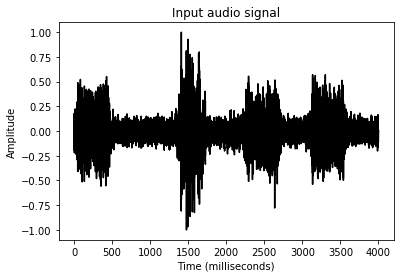

In [369]:
# Select a small component of the signal

#signal = signal[:40000]

time_axis = 1000 * np.arange(0,len(signal),1) / float(sampling_freq) # time in seconds

plt.plot(time_axis,signal,color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

In [370]:
### Transforming audio signals to frequency domain ###



If signal in time domain is $\{x_t\}=x_0,\ldots,x_{N-1}$, then its DFT is the signal in frequency domain, i.e. magnitude or energy (dB) as function of frequency 

$$\{\hat{x}_k\}=\hat{x}_0,\ldots,\hat{x}_{N-1},$$

$$\hat{x}_k =\sum_{t=0}^{N-1}x_t \left( \cos \left( \frac{2 \pi}{N}kt \right) -i \sin \left( \frac{2 \pi}{N}kt \right) \right).$$

Then normalized frequency domain signal is 
$$\frac{\hat{x}_k}{N},~k=0,\ldots,\frac{N}{2}.$$

where N is the length of the time domain.

Including only half of the time range is due to Nyquist frequency. 

•The Nyquist frequency is the highest estimated frequency, which is half of the sampling rate of a discrete signal processing signal. 

•The fundamental frequency is the lowest estimated frequency and is equal to 1/N. 

In [371]:
# Apply Fourier Transform. 

freq_signal = np.fft.fft(signal)
print(freq_signal.shape)
freq_signal # array of numpy.complex128

# We note that there are as many frequencies as there are discrete time steps

(176400,)


array([-754.90576172 +0.j        ,   -9.67416535-17.11077553j,
        -50.06467979+16.83495696j, ...,   20.82834691 -0.7663863j ,
        -50.06467979-16.83495696j,   -9.67416535+17.11077553j])

In [372]:
"""

Those complex numbers in the FFT result are simply just 2 real numbers, 
which are both required to give you the 2D coordinates of a result vector that has both a length 
and a direction angle (or magnitude and a phase). And every frequency component in the FFT result 
can have a unique amplitude and a unique phase (relative to some point in the FFT aperture).

If your FFT coefficient for a given frequency f is x + i y, you can look at x as the coefficient 
of a cosine at that frequency, while the y is the coefficient of the sine. If you add these two waves 
for a particular frequency, you will get a phase-shifted wave at that frequency; the magnitude of this wave 
is sqrt(x*x + y*y), equal to the magnitude of the complex coefficient.

The FFT is fundamentally a change of basis. The basis into which the FFT changes your original signal 
is a set of sine waves instead. In order for that basis to describe all the possible inputs it needs to 
be able to represent phase as well as amplitude; the phase is represented using complex numbers

"""

'\n\nThose complex numbers in the FFT result are simply just 2 real numbers, \nwhich are both required to give you the 2D coordinates of a result vector that has both a length \nand a direction angle (or magnitude and a phase). And every frequency component in the FFT result \ncan have a unique amplitude and a unique phase (relative to some point in the FFT aperture).\n\nIf your FFT coefficient for a given frequency f is x + i y, you can look at x as the coefficient \nof a cosine at that frequency, while the y is the coefficient of the sine. If you add these two waves \nfor a particular frequency, you will get a phase-shifted wave at that frequency; the magnitude of this wave \nis sqrt(x*x + y*y), equal to the magnitude of the complex coefficient.\n\nThe FFT is fundamentally a change of basis. The basis into which the FFT changes your original signal \nis a set of sine waves instead. In order for that basis to describe all the possible inputs it needs to \nbe able to represent phase as

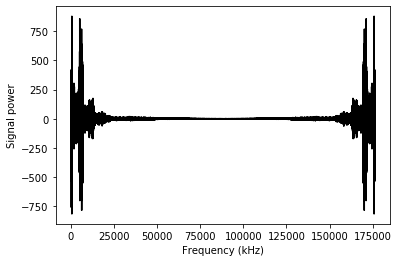

In [373]:
# Now plot the ENTIRE frequency domain (pre-normalization)

# Build the X axis
x_axis = np.arange(0, len(freq_signal), 1)

# Plot the figure
plt.figure()
plt.plot(x_axis, freq_signal, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power')
plt.show()

# We note below that frequency = 1 is the wave that completes an entire cycle in 1 sample

In [374]:
# We note that several different sample rates could be used that would yield differing sets of frequencies
# Normalize frequency domain signal by dividing the first half length of the DFT array by sampling frequency 
# (i.e. the number of time steps).

len_signal = len(signal)
print("length of the signal in time:", len_signal)
len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int) 
print("half that length", len_half)

# Dividing first half of DFT (freq signal) by sampling freq (len signal)
freq_signal = abs(freq_signal[0:len_half]) / len_signal
freq_signal

# We note that the complex numbers drop out here

length of the signal in time: 176400
half that length 88201


array([4.27951112e-03, 1.11429981e-04, 2.99429647e-04, ...,
       8.72616727e-07, 1.08892809e-06, 1.29405603e-06])

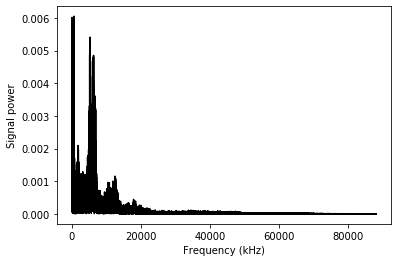

In [375]:
# Now plot the frequency domain

# Build the X axis
x_axis = np.arange(0, len_half, 1)

# Plot the figure
plt.figure()
plt.plot(x_axis, freq_signal, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power')
plt.show()

The power spectrum of the signal is then defined as $\{ |\hat{x}_k|^2 \}$.

In [376]:
# Calculating power spectrum: 

"""
Spectral Density, spectrum, or power spectrum of a time series describes the distribution of power (variance) 
into the frequency components composing that signal and is directly linked to the autocovariance time domain 
representation. Spectral Density, S_xx (λ), of a weakly stationary time series x_t is the Fourier transform of 
its autocovariance γ_k:
"""

freq_signal **= 2    
print(freq_signal.shape)

len_fts = len(freq_signal)




(88201,)


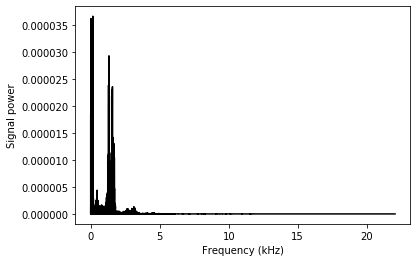

In [377]:
# Now plot the spectral density

# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

# Plot the figure
plt.figure()
plt.plot(x_axis, freq_signal, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power')
plt.show()

Power spectrum has property $S_{xx}(\lambda)=S_{xx}(-\lambda)$ which is called a two-sided power spectrum. 



In [378]:
"""
Typical analysis is done only with one-sided spectrum, i.e. with half of the power spectrum sequence. 
To preserve the total amount of energy shown in the half-range double the spectrum with adjustment 
for cases of even or odd length. Calculation of power spectrum is an important step of extracting feature
from speech signals. See more on feature extraction in a later section of the document.
"""

if len_signal % 2:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2

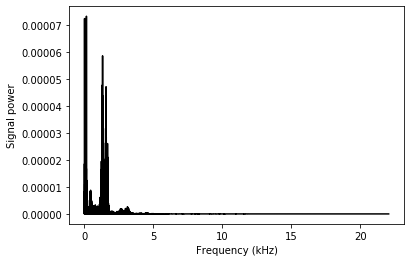

In [379]:
# Now plot the power spectrum.

# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

# Plot the figure
plt.figure()
plt.plot(x_axis, freq_signal, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power')
plt.show()

It is common to show spectrum in logarithmic units (decibels, dB). Logarithmic scale allows viewing wider dynamic ranges, i.e. small signal in the presence of large signal. 

General definition of decibel unit is 
$$1dB=10\log_{10} \left(\frac{P}{P_r} \right),$$
where $P$ is the measured power and $P_r$ is the reference power (in our case 1).



In [380]:
# Extract the power value in dB:

signal_power = 10 * np.log10(freq_signal)
signal_power

array([ -47.37211681,  -76.04965888,  -67.46380407, ..., -118.17322937,
       -116.24971606, -117.76093836])

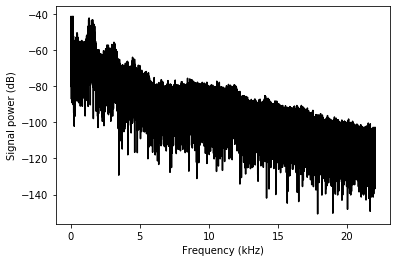

In [381]:
# Now plot the power spectrum in dB.

# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 1000.0

# Plot the figure
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

Extract features: Mel Frequency Cepstral Coefficients (MFCC). Recall from lecture slides how MFCC are calculated.

Function `mfcc()` has syntax:

`mfcc(signal, samplerate=16000, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=512, lowfreq=0, highfreq=None, preemph=0.97, ceplifter=22, appendEnergy=True, winfunc=<function <lambda> at 0x7f06854d6378>)`,
    
where:    
- `signal`: the audio signal from which to compute features. Should be an N*1 array
- `samplerate`: the sample rate of the signal
- `winlen`: the length of the analysis window in seconds. Default is 0.025s (25 milliseconds)
- `winstep`: the step between successive windows in seconds. Default is 0.01s (10 milliseconds)
- `numcep`: the number of cepstrum coefficients to return, default 13
- `nfilt`: the number of filters in the filterbank, default 26
- `nfft`: the FFT size. Default is 512.
- `lowfreq`: lowest band edge of mel filters. In Hz, default is 0.
- `highfreq`: highest band edge of mel filters. In Hz, default is samplerate/2 (Nyquist)
- `preemph`: apply preemphasis filter with preemph as coefficient. 0 is no filter. Default is 0.97.
- `ceplifter`: apply a lifter to final cepstral coefficients. 0 is no lifter. Default is 22.
- `appendEnergy`: if this is true, the zero lag cepstral coefficient is replaced with the log of the total frame energy. Default is True
- `winfunc`: the analysis window to apply to each frame. By default no window is applied. You can use numpy window functions here e.g. winfunc=numpy.hamming

The function returns a numpy array of size (`NUMFRAMES` by `numcep`) containing features. Each row holds 1 feature vector.

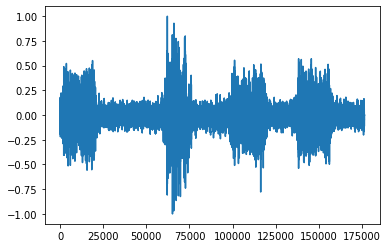

In [382]:
# original signal

plt.plot(signal)

In [383]:
# Apply MFCC. Power spectrum of slices -> Apply Mel filter (accentuate higher frequencies) -> Log -> IDFT

"""
•To create features apply to each frame 20-40 (26 is typical) triangular Ölters in frequency domain

•Such 26 Ölters are vectors of length 257. Each vector is di§erent from zero in a relatively narrow interval. 
Non-zero values form a triangular shape with width weighted by Mel scale. 
This means that for higher frequencies which cannot be distinguished as well, the width of the Ölter increases

•Calculate dot product of each frame periodogram and the Ölter vector

•The result shows total amount of energy concentrated in the band of each Ölter

•To complete feature extraction calculate 26 IDFT coe¢ cients of logs of the aggregated spectrum 
(cepstral coe¢ cients) and leave Örst 12-13 of them. The result is Mel Filterbank Cepstral Coe¢ cient (MFCC)

"""


print(sampling_freq)
features_mfcc = mfcc(signal, sampling_freq)

print(features_mfcc.shape)

# Print the parameters for MFCC.

print('\nMFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])
print('Mfcc shape: ',features_mfcc.shape)

# Below array is 182 windows by 13 cepstral coefficients
# Note that by default signal is cut into 25 ms slices with 10 ms shifts

features_mfcc[0:3]

44100
(399, 13)

MFCC:
Number of windows = 399
Length of each feature = 13
Mfcc shape:  (399, 13)


array([[ -2.67450121,   1.21378428, -19.49198994, -11.81663395,
        -20.47758997,   4.52744609, -11.13204657,  18.04418579,
         -3.2319363 ,  -7.2585469 ,   3.84362478,   7.7621487 ,
         14.17902314],
       [ -2.32373858,  -8.73395014, -27.3051713 , -20.94966473,
        -22.49120497,  -0.56564756, -14.81748705,  11.6543442 ,
        -18.48889118, -24.92083917, -23.06862502, -16.25121977,
         -5.96578548],
       [ -2.24059075,  -2.64981053, -25.72117258, -21.28262388,
        -23.14866258,   4.64181272, -14.661453  ,  15.52689638,
        -15.04954353, -24.05409846, -14.26873262, -13.15180546,
         -6.05956554]])

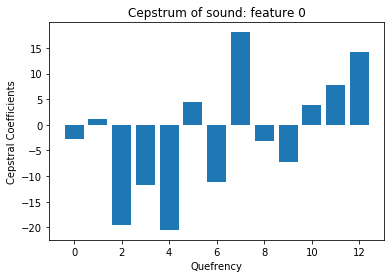

array([ -2.67450121,   1.21378428, -19.49198994, -11.81663395,
       -20.47758997,   4.52744609, -11.13204657,  18.04418579,
        -3.2319363 ,  -7.2585469 ,   3.84362478,   7.7621487 ,
        14.17902314])

In [384]:
# Quefrency of Frame 1

x_ax=range(features_mfcc.shape[1])

plt.bar(x_ax,features_mfcc[0],)
plt.xlabel('Quefrency')
plt.ylabel('Cepstral Coefficients')
plt.title('Cepstrum of sound: feature 0')
plt.show()

features_mfcc[0]

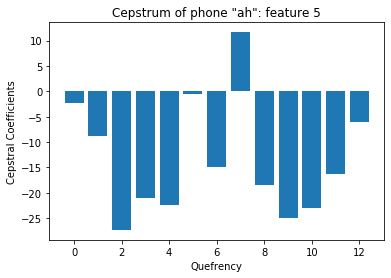

array([ -2.32373858,  -8.73395014, -27.3051713 , -20.94966473,
       -22.49120497,  -0.56564756, -14.81748705,  11.6543442 ,
       -18.48889118, -24.92083917, -23.06862502, -16.25121977,
        -5.96578548])

In [385]:
# Quefrency of Frame 1

plt.bar(x_ax, features_mfcc[1],)
plt.xlabel('Quefrency')
plt.ylabel('Cepstral Coefficients')
plt.title('Cepstrum of phone "ah": feature 5')
plt.show()

features_mfcc[1]

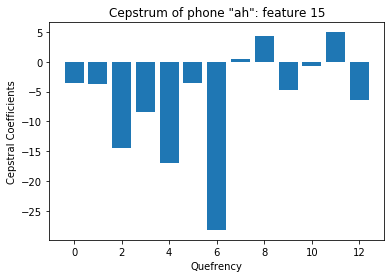

array([ -3.62361779,  -3.7500207 , -14.38034097,  -8.36853766,
       -16.91883677,  -3.4875122 , -28.12670938,   0.51230261,
         4.36020288,  -4.75978324,  -0.69680751,   4.92240615,
        -6.48598296])

In [386]:
# Quefrency of Frame 100

plt.bar(x_ax,features_mfcc[100],)
plt.xlabel('Quefrency')
plt.ylabel('Cepstral Coefficients')
plt.title('Cepstrum of phone "ah": feature 15')
plt.show()

features_mfcc[100]

Text(0.5, 1.05, 'MFCC')

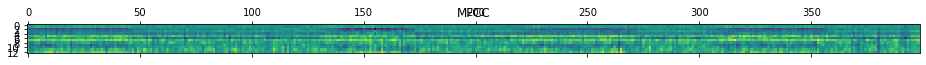

In [387]:
# Plot heat map of all features. 
# Interpret color codes by comparing with the printed column 20 of the transposed MFCC matrix.

plt.matshow(features_mfcc.T)
plt.title('MFCC')

Plot filterbank matrix. Make sense of color codes by comparing the plot with the printed column 100 of the transposed matrix.


Filter bank:
Number of windows = 399
Length of each feature = 26
[-7.99823424 -8.61820915 -8.79689906 -6.96652291 -6.45940633 -5.74662793
 -5.12290146 -2.04909476 -2.10467624 -2.61823467 -4.88078409 -3.52327982
 -2.99148367 -3.72375679 -4.27124676 -3.95240173 -5.0630537  -5.95696465
 -5.50765809 -5.08232194 -5.0436957  -4.80010344 -5.59428897 -5.97486646
 -7.13148069 -8.13000725]


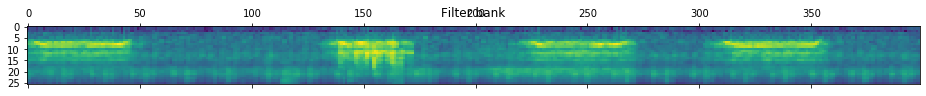

In [388]:
# Extract the Filter Bank features
features_fb = logfbank(signal, sampling_freq,nfft=1024)

# Print the parameters for Filter Bank 
print('\nFilter bank:\nNumber of windows =', features_fb.shape[0])
print('Length of each feature =', features_fb.shape[1])
print(features_fb.T[:,20])

# Plot the features
features_fb = features_fb.T
plt.matshow(features_fb)
plt.title('Filter bank')

plt.show()